<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/stats/stat_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install pingouin

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time
import pingouin 

from pingouin import corr
import pandas.util.testing as tm

cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")

ke_datafar = pd.read_csv("/content/drive/My Drive/data/Kenyans data.csv")

cco_cases_mdg.set_index('Date', inplace=True)

tilyvoa.set_index('Daty', inplace=True)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [259]:
tilyvoa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2020-3-18 to 2020-5-14
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loharano          51 non-null     object 
 1   Faritra           0 non-null      float64
 2   Tily ara-potoana  2 non-null      float64
 3   Tilytot tvm       11 non-null     float64
 4   Tilyvoaamb        51 non-null     float64
 5   Tily              39 non-null     float64
 6   Voa               38 non-null     float64
 7   Voatomb           51 non-null     float64
 8   Voavao tvm        45 non-null     float64
 9   Tsyvoa            38 non-null     float64
 10  Tsyvoatomb        51 non-null     float64
 11  Tilym             38 non-null     float64
 12  Voareh ilain      38 non-null     float64
 13  Voareh tvm        45 non-null     float64
 14  Sitranreh ilain   38 non-null     float64
 15  Sitranreh tvm     33 non-null     float64
 16  Sitranvao tvm     32 non-null     fl

In [260]:
tily = tilyvoa.loc[:,'Tily']
voa = tilyvoa.loc[:, 'Voa']
tsyvoa = tilyvoa.loc[:, 'Tsyvoa']
tilym = tilyvoa.loc[:,'Tilym']
type(voa)

pandas.core.series.Series

In [228]:
corr(tily, voa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.029952,"[-0.29, 0.35]",0.000897,-0.056194,0.858324,0.053277


In [229]:
corr(tily, tsyvoa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.986159,"[0.97, 0.99]",0.97251,0.970939,1.075574e-29,1.0


In [230]:
corr(tily, voa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.073568,"[-0.25, 0.38]",0.005412,-0.051421,0.665215,0.072135


In [231]:
corr(tily, tsyvoa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.985293,"[0.97, 0.99]",0.970803,0.969134,1.889566e-28,1.0


In [232]:
corr(tily, voa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.071734,"[-0.25, 0.38]",0.005146,-0.051703,0.677592,0.071009


In [233]:
corr(tily, tsyvoa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.987895,"[0.98, 0.99]",0.975937,0.974562,4.178122e-29,1.0


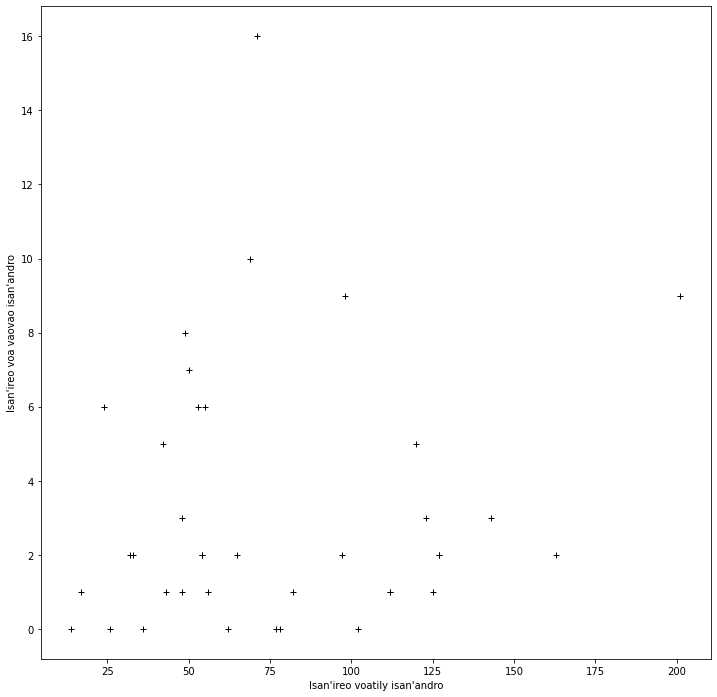

In [264]:
plt.figure(figsize=(12, 12))
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo voa vaovao isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa.eps')
plt.savefig(path_to_save+'tilvoa.png')

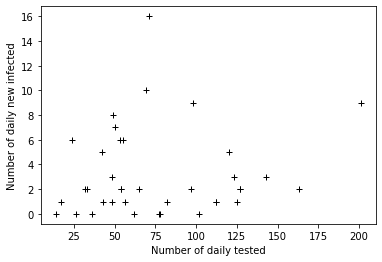

In [263]:
plt.figure()
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily new infected")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa_eng.png')

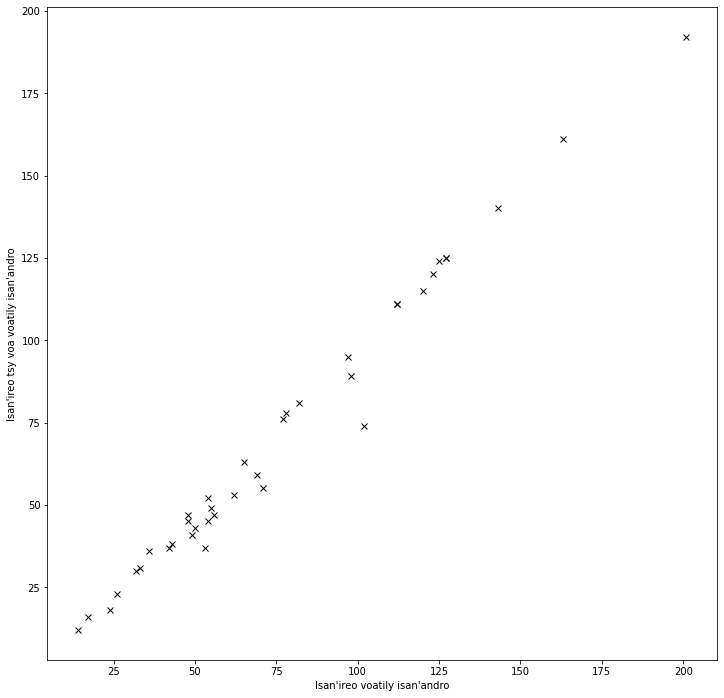

In [265]:
plt.figure(figsize=(12, 12))
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo tsy voa voatily isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa.eps')
plt.savefig(path_to_save+'tiltsvoa.png')

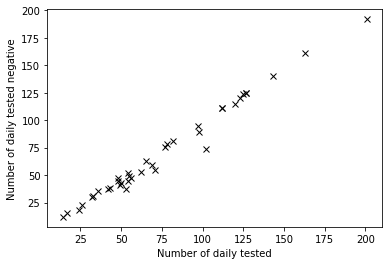

In [237]:
plt.figure()
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily tested negative")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa_eng.eps')
plt.savefig(path_to_save+'tiltsvoa_eng.png')

In [0]:
# Construction of contingency table
bt = pd.IntervalIndex.from_tuples([(13, 47), (47, 81), (81, 210)])
btt = pd.IntervalIndex.from_tuples([(10, 47), (47, 81), (81, 210)])
bv = pd.IntervalIndex.from_tuples([(-0.1, 1), (1,17)])

tilyvoa['Tily_heba'] = pd.cut(tilyvoa['Tily'], bins=bt, include_lowest=True)
tilyvoa['Voa_heba'] = pd.cut(tilyvoa['Voa'], bins=bv, include_lowest=True)
tilyvoa['Tilym_heba'] = pd.cut(tilyvoa['Tilym'], bins=bt, include_lowest=True)
tilyvoa['Tsyvoa_heba'] = pd.cut(tilyvoa['Tsyvoa'], bins=btt, include_lowest=True)

ddt = tilyvoa.loc[ : , ['Tily', 'Tily_heba'] ]
ddv = tilyvoa.loc[ : , ['Voa', 'Voa_heba'] ]
ddtv = tilyvoa.loc[ : , ['Tsyvoa', 'Tsyvoa_heba'] ]
ddtm = tilyvoa.loc[ : , ['Tilym', 'Tilym_heba'] ]


#print(ddt)
#print(ddv)

In [0]:
tomb_tv, hita_tv, stats_tv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Voa_heba')
tomb_tmv, hita_tmv, stats_tmv = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
tomb_ttv, hita_ttv, stats_ttv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Tsyvoa_heba')

tombm_ttv, hitam_ttv, statsm_ttv = pingouin.chi2_independence(tilyvoa, x='Tily', y='Tsyvoa')

print(tomb_tv)
print(tomb_tmv)
print(tomb_ttv)
print(hita_ttv)
print(hitam_ttv)

In [240]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
observed

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


Voa_heba,"(-0.1, 1.0]","(1.0, 17.0]"
Tilym_heba,,
"(13, 47]",5,5
"(47, 81]",5,9
"(81, 210]",5,9


In [241]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
stats.round(5)

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


,test,lambda,chi2,dof,p,cramer,power
0,pearson,1.00000,0.62940,2.0,0.73001,0.10417,0.10045
1,cressie-read,0.66667,0.62616,2.0,0.73119,0.10390,0.10017
2,log-likelihood,0.00000,0.62100,2.0,0.73308,0.10347,0.09974
3,freeman-tukey,-0.50000,0.61825,2.0,0.73409,0.10325,0.09951
4,mod-log-likelihood,-1.00000,0.61645,2.0,0.73475,0.10309,0.09935
5,neyman,-2.00000,0.61557,2.0,0.73507,0.10302,0.09928


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


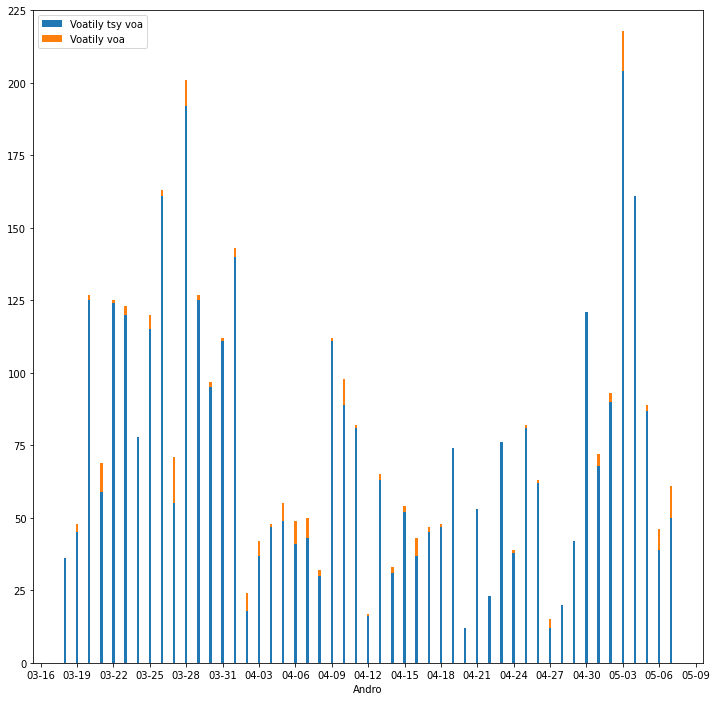

In [266]:
tilyvoa.index = pd.to_datetime(tilyvoa.index)

#df = pd.DataFrame(index=tilyvoa.index, data={'Voatily tsy voa': tilyvoa['Tsyvoa'], 'Voatily voa':tilyvoa['Voa']})
#df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoa.index, tilyvoa['Tsyvoatomb'], width= 0.2, label = 'Voatily tsy voa')
ax.bar(tilyvoa.index, tilyvoa['Voatomb'], width= 0.2, bottom = tilyvoa['Tsyvoatomb'], label = 'Voatily voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,225)
plt.savefig(path_to_save+'mdgtahatv.eps')

plt.show()

In [267]:
datacounty = ke_datafar.groupby('Faritra')

ketilyvoa = datacounty.get_group('Kenya')

ketilyvoa.set_index('Daty', inplace=True)
ketilyvoa.index = pd.to_datetime(ketilyvoa.index)
datacounty.get_group('Kenya').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 263
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Monitored/close contacts          12 non-null     object 
 1   Discharged after being monitored  9 non-null      float64
 2   Followed up                       7 non-null      float64
 3   Daty                              60 non-null     object 
 4   Faritra                           60 non-null     object 
 5   Tilytot                           12 non-null     float64
 6   Tilyvao                           11 non-null     float64
 7   Tilyvaotomb                       54 non-null     float64
 8   Itot                              54 non-null     float64
 9   Ivao                              54 non-null     float64
 10  Rtot                              12 non-null     float64
 11  Rvao                              18 non-null     float64
 12  Matot    

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


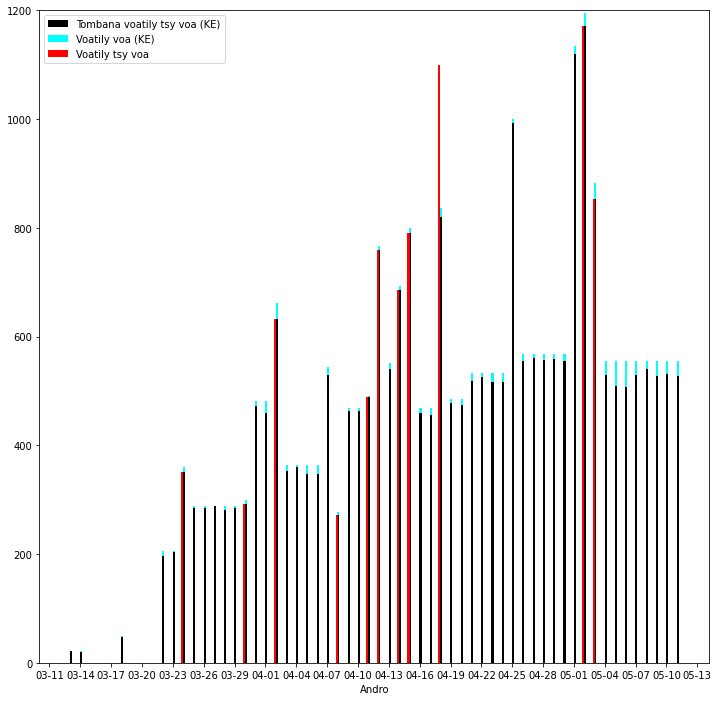

In [269]:
fig, ax = plt.subplots(figsize=(12, 12))

frt = np.ones(len(ketilyvoa.index))*datetime.timedelta(hours=2)

ax.bar(ketilyvoa.index + frt, ketilyvoa['Tsyvoatomb'], width= 0.2, color = 'black', label = 'Tombana voatily tsy voa (KE)')
ax.bar(ketilyvoa.index + frt, ketilyvoa['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoa['Tsyvoatomb'], label = 'Voatily voa (KE)')
ax.bar(ketilyvoa.index - frt, ketilyvoa['Tsyvoa'], width= 0.2, color = 'red', label = 'Voatily tsy voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(0,1200)
plt.savefig(path_to_save+'ketahatv.eps')

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


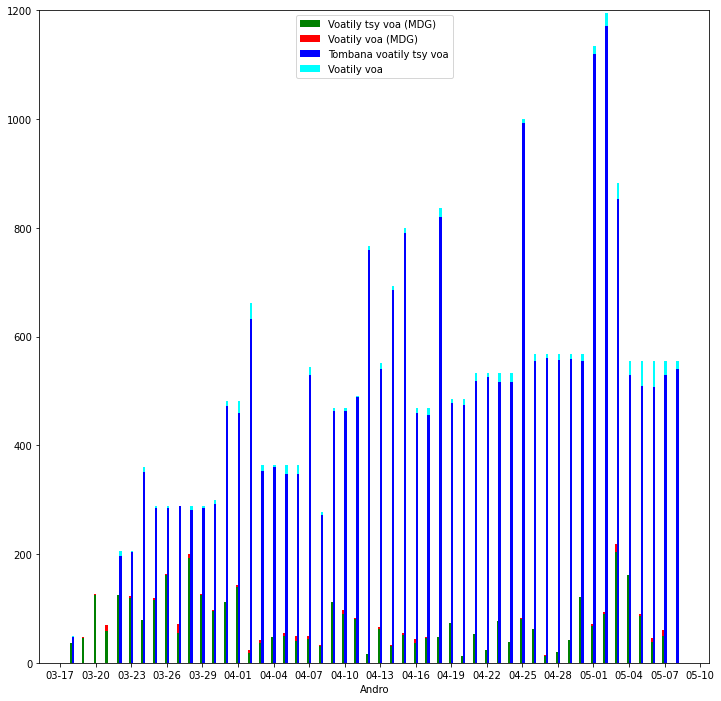

In [278]:
ketilyvoam = ketilyvoa.loc['2020-03-18':'2020-05-08']
tilyvoam = tilyvoa.loc['2020-03-18':'2020-05-08']

fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoam.index))*datetime.timedelta(hours=2)

ax.bar(tilyvoam.index - frtm, tilyvoam['Tsyvoatomb'], width = 0.2, color= 'green', label = 'Voatily tsy voa (MDG)')
ax.bar(tilyvoam.index - frtm, tilyvoam['Voatomb'], width = 0.2, color= 'red', bottom = tilyvoam['Tsyvoatomb'], label = 'Voatily voa (MDG)')

ax.bar(ketilyvoam.index + frtm, ketilyvoam['Tsyvoatomb'], width= 0.2, color = 'blue', label = 'Tombana voatily tsy voa')
ax.bar(ketilyvoam.index + frtm, ketilyvoam['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoam['Tsyvoatomb'], label = 'Voatily voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1200)
plt.savefig(path_to_save+'mdgkesartv.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


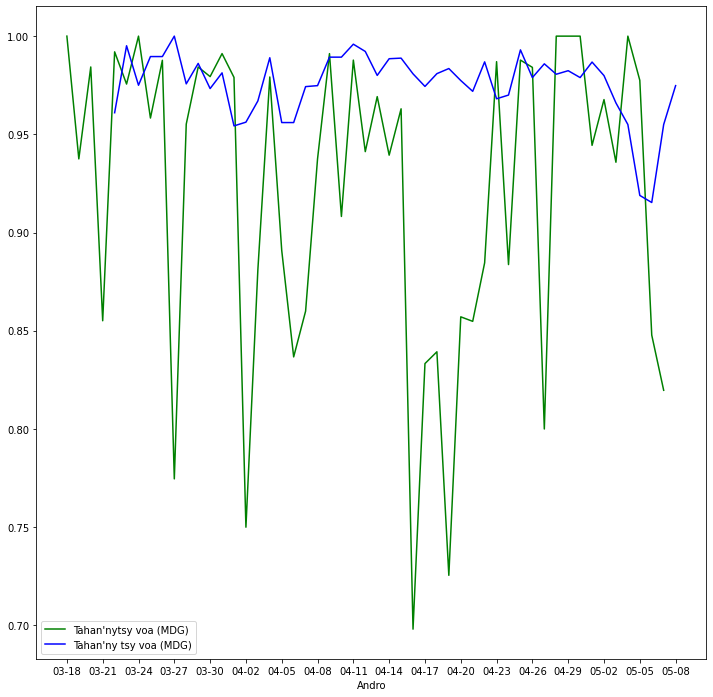

In [281]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoam.index, tilyvoam['Tahatv'], color= 'green', label = "Tahan'nytsy voa (MDG)")
ax.plot(ketilyvoam.index, ketilyvoam['Tahaketv'], color= 'blue', label = "Tahan'ny tsy voa (MDG)")
       
ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgketahatv.eps')

plt.show()